In [10]:
import numpy as np
import cv2 as cv
import os
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import Dense,Flatten

### Model Constants

In [11]:
batch_size = 64
steps_per_epoch = 125
num_epoch = 20

In [12]:
trainX = np.load('dataset/train_photos.npy')
trainY = np.load('dataset/train_labels.npy')
testX = np.load('dataset/test_photos.npy')
testY = np.load('dataset/test_labels.npy')

In [13]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(8000, 224, 224, 3)
(8000,)
(2000, 224, 224, 3)
(2000,)


1.0


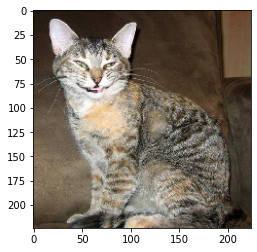

In [14]:
img = array_to_img(trainX[0])
print(trainY[0])
plt.imshow(img)
plt.show()

## Define Neural Network
200x200x3 = 120000

batch size = 32
input(32,200,200,3) -> input(1,3840000)*matrix1(3840000,100) -> activation(1,100) -> layer1(1,100)*matrix2(100,1) -> [output value]

### Train the model 

In [19]:
# model = Sequential(
# [Input(shape=(224,224,3)),
 
# Flatten(),
# Dense(100,activation='relu'),
# Dense(1)])
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',strides=(1, 1), padding='same', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

### Define Loss and Gradient Descent

In [20]:
opt = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x=trainX,y=trainY,batch_size=batch_size,shuffle=True,epochs=num_epoch,steps_per_epoch=steps_per_epoch)

Epoch 1/20
 91/125 [====================>.........] - ETA: 2:30 - loss: 3.7914 - accuracy: 0.5817